# **Algoritmo de Agrupamiento**

In [83]:
import pandas as pd
df = pd.read_excel("Ejemplo-k-medias.xlsx")

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Edad                28 non-null     int64 
 1   Ingresos            28 non-null     int64 
 2   Educación Superior  28 non-null     object
 3   Estado Civil        28 non-null     object
 4   Estudio Postgrado   28 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.2+ KB


In [85]:
df

,Edad,Ingresos,Educación Superior,Estado Civil,Estudio Postgrado
0,8,11,si,casado,si
1,8,3,si,casado,no
2,5,9,si,casado,si
3,8,8,si,casado,si
4,6,11,si,casado,si
5,6,11,si,casado,no
6,6,7,no,casado,no
7,8,8,si,casado,si
8,6,10,si,casado,no
9,5,8,si,casado,si


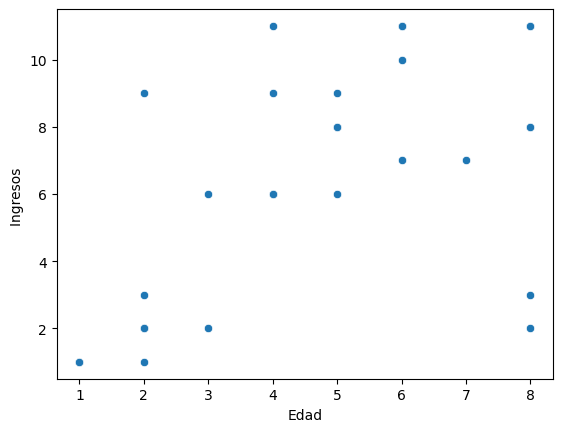

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x="Edad", y="Ingresos ")
plt.show()

In [6]:
#Librerías
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [21]:
#Modelo
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
grupo  = kmeans.fit_predict(df[["Edad", "Ingresos "]])
df['Clasificacion']=grupo

In [22]:
#Varia desde -1 hasta 1
#mide que tan separados estan los grupos , el 1 es el mejor
print("Puntaje",silhouette_score(df[["Edad", "Ingresos "]], grupo))

Puntaje 0.40762364776995413


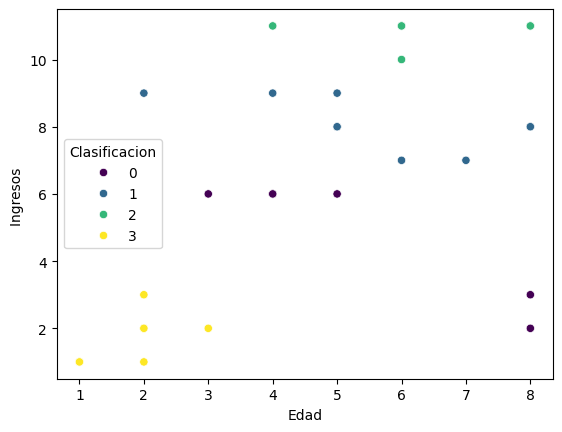

In [23]:
sns.scatterplot(data=df,x="Edad", y="Ingresos ",hue="Clasificacion",palette="viridis")
plt.show()

# **Algoritmos de reducción de dimensionalidad**

In [24]:
#Librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [26]:
mnist = fetch_openml('mnist_784',version=1,as_frame=False)
X=mnist.data
y=mnist.target.astype(int)

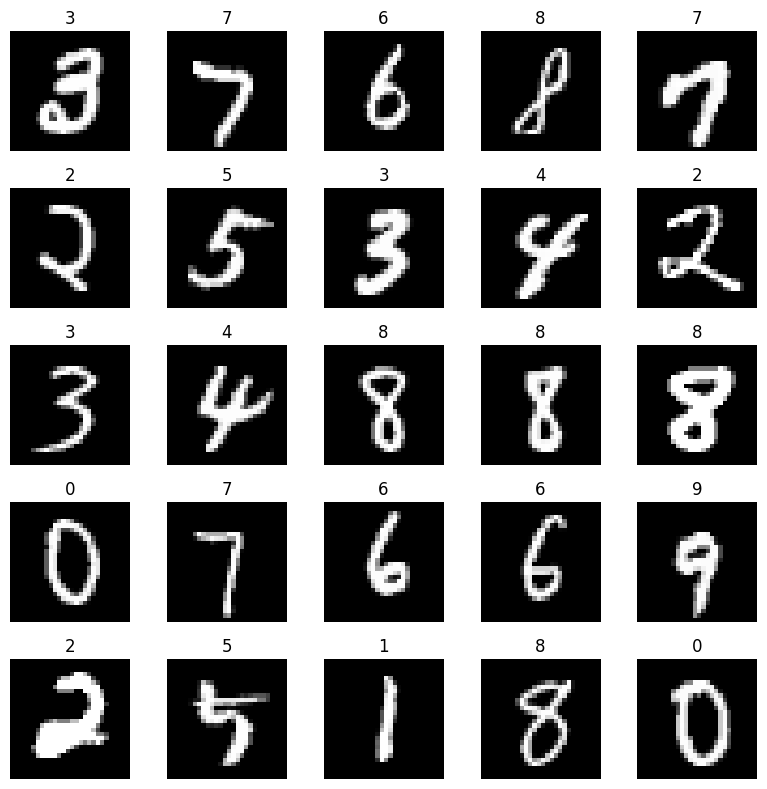

In [30]:
#graficos
N = 25
idx = np.random.choice(X.shape[0],N,replace=False)
X_sample = X[idx]
y_sample = y[idx]
fig,axes=plt.subplots(5,5,figsize=(8,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(X_sample[i].reshape(28,28),cmap='gray')
    ax.set_title(y_sample[i])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [33]:
#muestra de 2000 imagenes
idx = np.random.choice(X.shape[0],2000,replace=False)
X_sample = X[idx]
y_sample = y[idx]

In [34]:
from sklearn.manifold import TSNE
import umap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [36]:
#Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

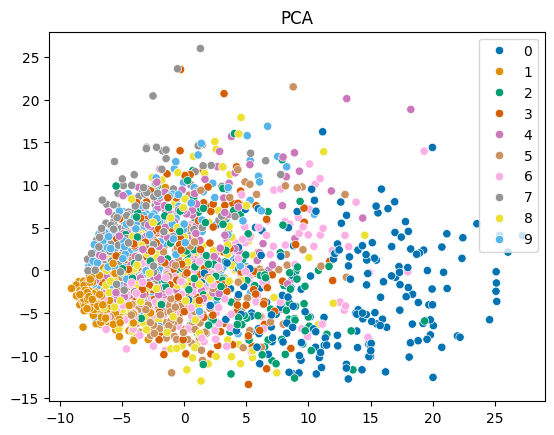

In [56]:
#PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue=y_sample,palette='colorblind')
plt.title("PCA")
plt.show()

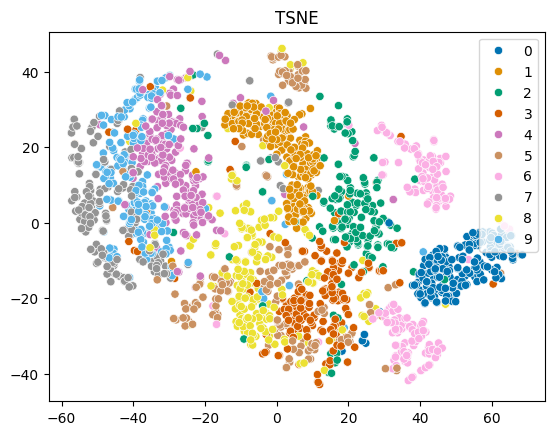

In [57]:
#Tsne
tsne = TSNE(n_components=2,perplexity=30,random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
sns.scatterplot(x=X_tsne[:,0],y=X_tsne[:,1],hue=y_sample,palette='colorblind')
plt.title("TSNE")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


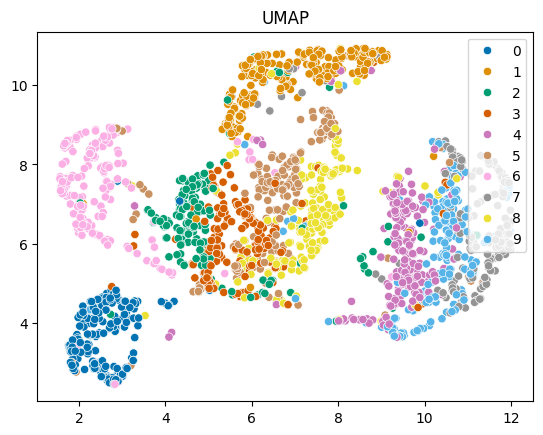

In [58]:
#Umap
umap_model = umap.UMAP(n_components=2,random_state=42)
X_umap = umap_model.fit_transform(X_scaled)
sns.scatterplot(x=X_umap[:,0],y=X_umap[:,1],hue=y_sample,palette='colorblind')
plt.title("UMAP")
plt.show()

# **DataFrama y pronósticos**

In [113]:
import pandas as pd
df = pd.read_excel("Ejemplo5.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PAÍS            37010 non-null  object        
 1   FORMA DE VENTA  37010 non-null  object        
 2   FORMA DE PAGO   37010 non-null  object        
 3   CANTIDAD        37010 non-null  int64         
 4   PRECIO          37010 non-null  float64       
 5   FECHA           37010 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 1.7+ MB


In [114]:
df["MONTO"] = df["CANTIDAD"]*df["PRECIO"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PAÍS            37010 non-null  object        
 1   FORMA DE VENTA  37010 non-null  object        
 2   FORMA DE PAGO   37010 non-null  object        
 3   CANTIDAD        37010 non-null  int64         
 4   PRECIO          37010 non-null  float64       
 5   FECHA           37010 non-null  datetime64[ns]
 6   MONTO           37010 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [62]:
df

,PAÍS,FORMA DE VENTA,FORMA DE PAGO,CANTIDAD,PRECIO,FECHA,MONTO
0,Colombia,Redes Sociales,Cheque,10,16.10,2022-10-30 19:58:47.290,161.00
1,Ecuador,Redes Sociales,Cheque,6,15.05,2024-08-19 00:32:41.044,90.30
2,Colombia,Redes Sociales,Cheque,6,12.20,2021-07-06 12:17:58.275,73.20
3,Peru,Redes Sociales,Cheque,8,10.75,2023-08-18 14:53:04.834,86.00
4,Ecuador,E-Mail,Tarjeta de Credito,6,60.25,2024-09-02 17:19:46.844,361.50
...,...,...,...,...,...,...,...
37005,Peru,Redes Sociales,Transferencia Electronica,13,24.85,2023-01-01 08:24:38.526,323.05
37006,Guatemala,Redes Sociales,Transferencia Electronica,10,23.55,2024-01-05 01:18:12.981,235.50
37007,Peru,Redes Sociales,Transferencia Electronica,6,23.05,2023-07-31 00:31:16.147,138.30
37008,Mexico,Redes Sociales,Transferencia Electronica,6,22.75,2024-08-15 14:11:18.582,136.50


In [115]:
#CONVERTIR A DATATIME
df['FECHA'] = pd.to_datetime(df['FECHA'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PAÍS            37010 non-null  object        
 1   FORMA DE VENTA  37010 non-null  object        
 2   FORMA DE PAGO   37010 non-null  object        
 3   CANTIDAD        37010 non-null  int64         
 4   PRECIO          37010 non-null  float64       
 5   FECHA           37010 non-null  datetime64[ns]
 6   MONTO           37010 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [152]:
# Agrupar por mes
ventas_mensuales = (
    df
    .groupby(df['FECHA'].dt.to_period('M'))['MONTO']
    .sum()
    .to_timestamp()
    .reset_index()
    .rename(columns={'FECHA': 'Fecha', 'VENTAS': 'Ventas'})
)

ventas_mensuales.set_index('Fecha', inplace=True)

In [124]:
ventas_mensuales

,MONTO
Fecha,
2020-01-01,170880.97
2020-02-01,157583.59
2020-03-01,155455.87
2020-04-01,177785.10
2020-05-01,153477.69
2020-06-01,173407.64
2020-07-01,175225.62
2020-08-01,166744.39
2020-09-01,168864.79


In [125]:
ventas_mensuales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2020-01-01 to 2024-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MONTO   60 non-null     float64
dtypes: float64(1)
memory usage: 960.0 bytes


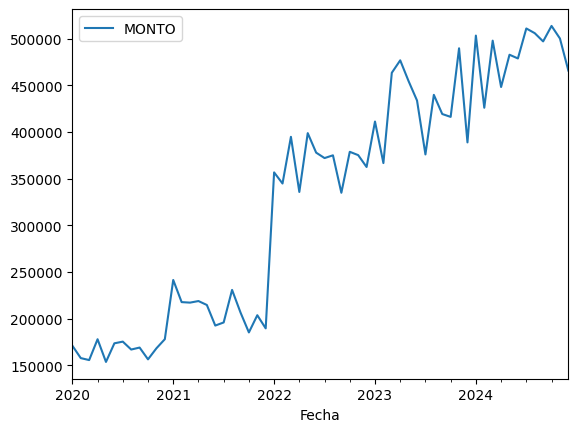

In [153]:
import matplotlib.pyplot as plt
ventas_mensuales.plot()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


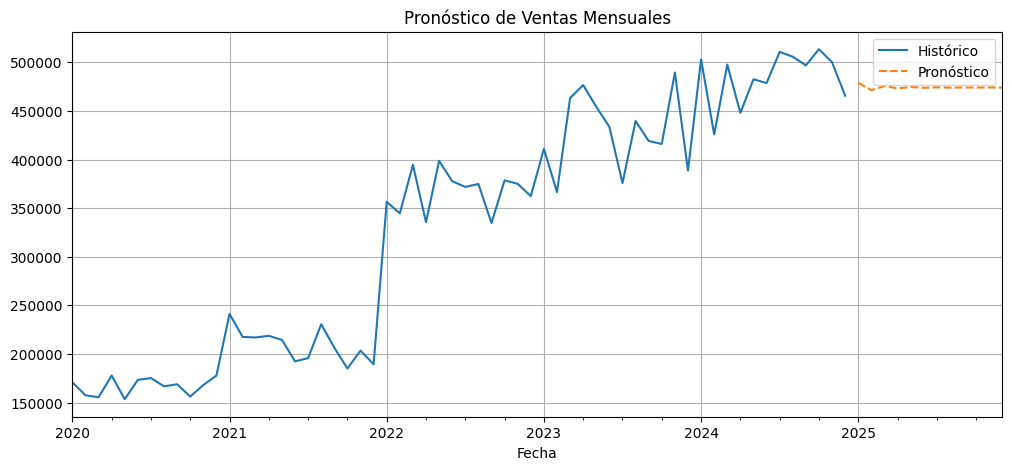

In [154]:
from statsmodels.tsa.arima.model import ARIMA

# Crear y ajustar modelo ARIMA (puedes ajustar los parámetros p,d,q)
modelo = ARIMA(ventas_mensuales['MONTO'], order=(1, 1, 1))
modelo_fit = modelo.fit()

# Hacer pronóstico de los próximos 12 meses
pronostico = modelo_fit.forecast(steps=12)

ventas_mensuales['Pronóstico'] = modelo_fit.predict(start=0, end=len(ventas_mensuales)-1)
pronostico_df = pd.DataFrame({'Fecha': pd.date_range(ventas_mensuales.index[-1] + pd.offsets.MonthBegin(),
                                                     periods=12, freq='MS'),
                              'MONTO': pronostico.values})
pronostico_df.set_index('Fecha', inplace=True)

# Unir y graficar
plt.figure(figsize=(12, 5))
ventas_mensuales['MONTO'].plot(label='Histórico')
pronostico_df['MONTO'].plot(label='Pronóstico', linestyle='--')
plt.legend()
plt.title("Pronóstico de Ventas Mensuales")
plt.grid(True)
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddye0g46/w_1jj3dx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddye0g46/yhqewny0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4548', 'data', 'file=/tmp/tmpddye0g46/w_1jj3dx.json', 'init=/tmp/tmpddye0g46/yhqewny0.json', 'output', 'file=/tmp/tmpddye0g46/prophet_modelp6mrnxpg/prophet_model-20250426222512.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:25:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:25:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Figure size 1200x500 with 0 Axes>

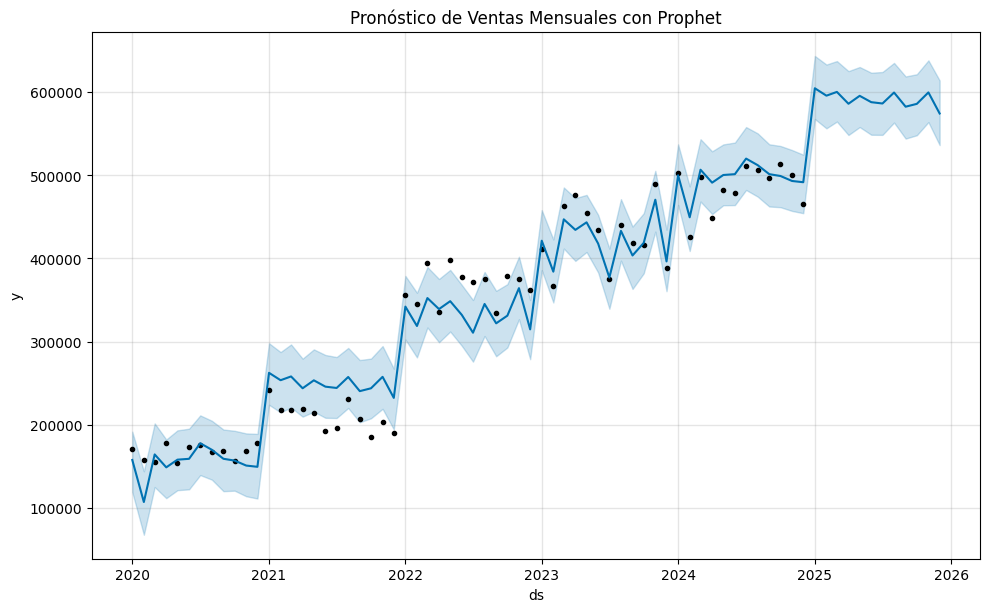

In [155]:
from prophet import Prophet
df_prophet = ventas_mensuales.reset_index().rename(columns={'Fecha': 'ds', 'MONTO': 'y'})
modelo_prophet = Prophet()
modelo_prophet.fit(df_prophet)
pronostico = modelo_prophet.make_future_dataframe(periods=12, freq='MS')
pronostico = modelo_prophet.predict(pronostico)
plt.figure(figsize=(12, 5))
modelo_prophet.plot(pronostico)
plt.title("Pronóstico de Ventas Mensuales con Prophet")
plt.grid(True)
plt.show()

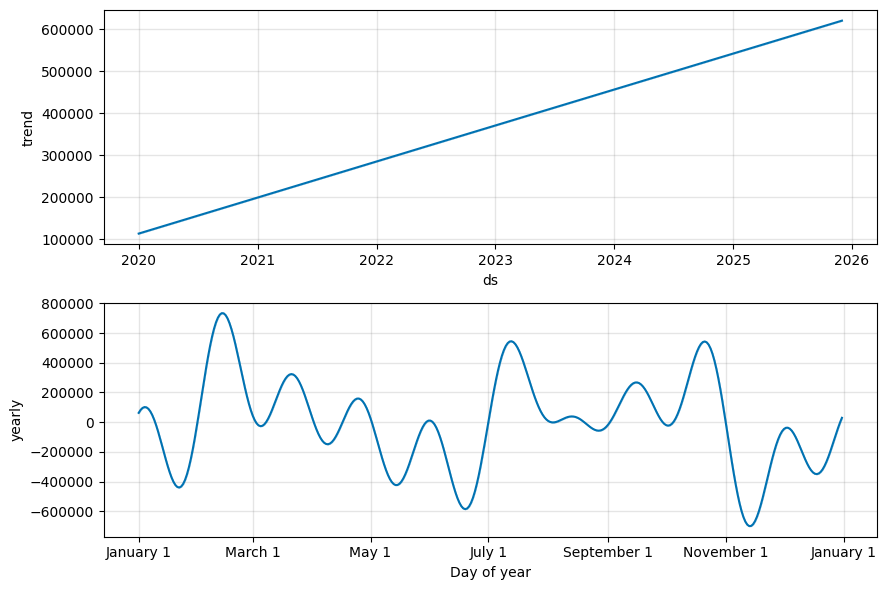

In [143]:
modelo_prophet.plot_components(pronostico)
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


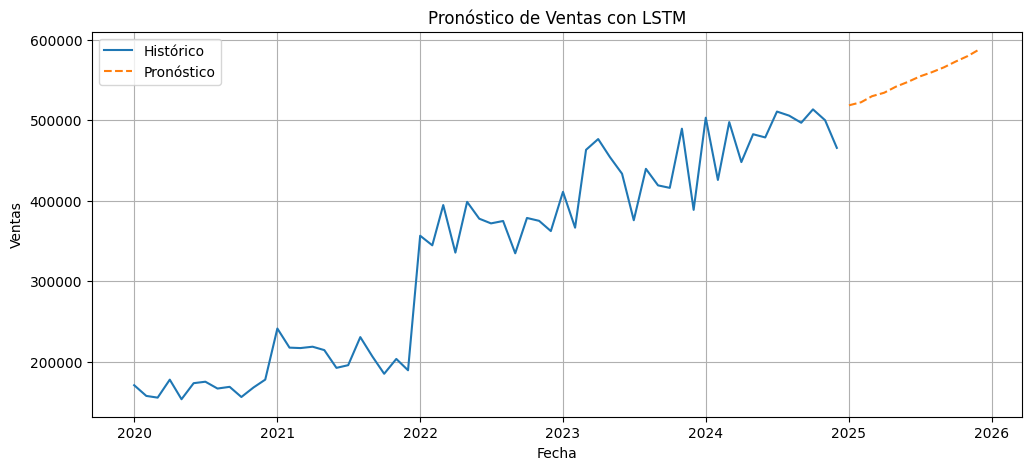

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


ventas_mensuales = (
    df.groupby(df['FECHA'].dt.to_period('M'))['MONTO']
    .sum()
    .to_timestamp()
    .reset_index()
    .rename(columns={'FECHA': 'Fecha', 'MONTO': 'MONTO'})
)

# Escalar los datos
scaler = MinMaxScaler()
ventas_scaled = scaler.fit_transform(ventas_mensuales[['MONTO']])

# Crear secuencias de entrada/salida
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

n_steps = 12  # usar 12 meses previos para predecir el siguiente
X, y = create_sequences(ventas_scaled, n_steps)

# Reformatear para LSTM: [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# === Paso 2: Construir la red LSTM ===
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
model.fit(X, y, epochs=100, verbose=0)
x_input = ventas_scaled[-n_steps:].reshape((1, n_steps, 1))

# Predecir los siguientes 12 meses
predictions = []
for _ in range(12):
    yhat = model.predict(x_input, verbose=0)
    predictions.append(yhat[0][0])
    x_input = np.append(x_input[:, 1:, :], [[[yhat[0][0]]]], axis=1)

# Invertir la escala para volver a los valores originales
forecast = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
last_date = ventas_mensuales['Fecha'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.offsets.MonthBegin(), periods=12, freq='MS')
forecast_df = pd.DataFrame({'Fecha': future_dates, 'Pronóstico': forecast.flatten()})

# Graficar
plt.figure(figsize=(12, 5))
plt.plot(ventas_mensuales['Fecha'], ventas_mensuales['MONTO'], label='Histórico')
plt.plot(forecast_df['Fecha'], forecast_df['Pronóstico'], label='Pronóstico', linestyle='--')
plt.title("Pronóstico de Ventas con LSTM")
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()
